In [36]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import numpy as np

from helpers import *

@FuncFormatter
def duration_fmt(x, pos):
    return humanize.precisedelta(x, minimum_unit='minutes',format='%0.0f')


In [37]:
method_order = ["CliqueSNV", "HaploConduct", "PredictHaplo"]

### precision and recall plots

In [38]:
fname_pr_results = "../../results/realdata/performance_measures/global/csv_files/pr_results.csv"
    
df = pd.read_csv(fname_pr_results)
df.loc[:,'subsampling_prop'] = df['params'].str.split('5-virus-mix@').str[1].str.split('__').str[0]
df['Method'] = df.apply(f_method_name, axis=1)
df = df[df['subsampling_prop']=='1']

# compute f1 score
df["f1"] = 2 * (df["precision"] * df["recall"]) / (df["precision"] + df["recall"]) 
df["f1"] = df["f1"].fillna(0)

# transform dataframe in right format
df = pd.melt(df, 
            id_vars=["params", "replicate", "method", "Method"], 
            value_vars= ["precision", "recall", "f1"], 
            var_name="measure", 
            value_name="value", 
            ignore_index=True)

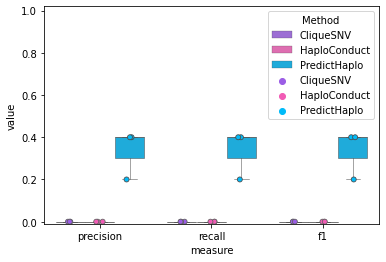

In [39]:
fig, ax = plt.subplots()


sns.boxplot(
        data=df,
        x="measure",
        y="value",
        hue="Method",
        hue_order= method_order,
        palette=method_palette,
        width=0.8,
        linewidth=0.5,
        ax=ax
    )
sns.stripplot(
    data=df,
    x="measure",
    y="value",
    hue="Method", 
    hue_order= method_order,  
    palette=method_palette,  
    dodge=True,
    #clip_on=False,
    linewidth=0.8,
    edgecolor="gray",
    ax=ax,
)

ax.set_ylim(-0.01, 1.02)

fig.savefig("./figures/Figure_4C_realdata.svg")

### plot N50

In [40]:
fname_n50  = "../../results/realdata/performance_measures/global/csv_files/quast_results.csv"

df_n50 = pd.read_csv(fname_n50)
df_n50.loc[:,'subsampling_prop'] = df_n50['params'].str.split('5-virus-mix@').str[1].str.split('__').str[0]
df_n50['Method'] = df_n50.apply(f_method_name, axis=1)
df_n50 = df_n50[df_n50['subsampling_prop']=='1']

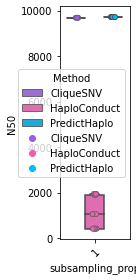

In [43]:
fig, ax = plt.subplots()
fig.set_figwidth(2)

sns.boxplot(data=df_n50, 
            x="subsampling_prop", 
            y="N50", 
            hue="Method", 
            hue_order= method_order,  
            palette=method_palette,  
            ax=ax)

sns.stripplot(
    data=df_n50,
    x="subsampling_prop",
    y="N50",
    hue="Method",
    hue_order= method_order,  
    palette=method_palette,  
    dodge=True,
    clip_on=False,
    linewidth=0.8,
    edgecolor="gray",
    ax=ax,
)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor"
)


fig.tight_layout()
fig.savefig("./figures/Figure_4C_realdata_n50.svg")